### Simulated Annealing From Scratch in Python

https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/

This means that it makes use of randomness as part of the search process. This makes the algorithm appropriate for nonlinear objective functions where other local search algorithms do not operate well.

Like the stochastic *hill climbing local* search algorithm, it modifies a single solution and searches the relatively local area of the search space until the local optima is located. Unlike the hill climbing algorithm, it may accept worse solutions as the current working solution.

The likelihood of accepting worse solutions starts high at the beginning of the search and decreases with the progress of the search, giving the algorithm the opportunity to first locate the region for the global optima, escaping local optima, then hill climb to the optima itself.

Hyperparameter:
- temperature = initial_temperature / (iteration_number + 1)

The acceptance of worse solutions uses the temperature as well as the difference between the objective function evaluation of the worse solution and the current solution. A value is calculated between 0 and 1 using this information, indicating the likelihood of accepting the worse solution. This distribution is then sampled using a random number, which, if less than the value, means the worse solution is accepted.

This is called the metropolis acceptance criterion and for minimization is calculated as follows:
- criterion = exp( -(objective(new) – objective(current)) / temperature)

The effect is that poor solutions have more chances of being accepted early in the search and less likely of being accepted later in the search. The intent is that the high temperature at the beginning of the search will help the search locate the basin for the global optima and the low temperature later in the search will help the algorithm hone in on the global optima.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

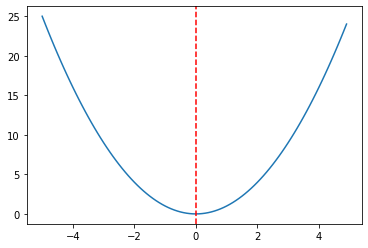

In [3]:
# objective function
def objective(x):
    return x[0]**2.0

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
plt.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')

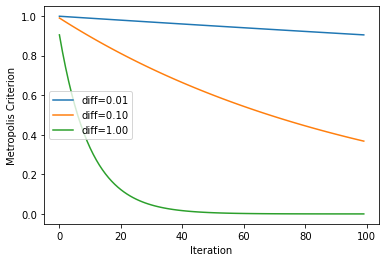

In [7]:
# explore metropolis acceptance criterion for simulated annealing
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# metropolis acceptance criterion
differences = [0.01, 0.1, 1.0]
for d in differences:
    metropolis = [math.exp(-d/t) for t in temperatures]
    # plot iterations vs metropolis
    label = 'diff=%.2f' % d
    plt.plot(iterations, metropolis, label=label)
# inalize plot
plt.xlabel('Iteration')
plt.ylabel('Metropolis Criterion')
plt.legend()

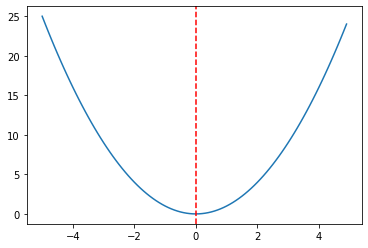

In [48]:
# seed the pseudorandom number generator
np.random.seed(16)

# objective function
def objective(x):
    return x[0]**2.0

inputs = np.arange(bounds[0, 0], bounds[0, 1], 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
plt.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')

>0 f([-2.49764237]) = 6.23822
>1 f([-2.37454355]) = 5.63846
>5 f([-2.35392595]) = 5.54097
>6 f([-2.33373579]) = 5.44632
>14 f([-2.19744376]) = 4.82876
>15 f([-2.17239742]) = 4.71931
>20 f([-2.13529731]) = 4.55949
>21 f([-2.0796553]) = 4.32497
>22 f([-2.05630155]) = 4.22838
>30 f([-1.94287669]) = 3.77477
>33 f([-1.81143907]) = 3.28131
>34 f([-1.7805327]) = 3.17030
>35 f([-1.57948922]) = 2.49479
>36 f([-1.41201817]) = 1.99380
>37 f([-1.36169883]) = 1.85422
>38 f([-1.25897291]) = 1.58501
>39 f([-1.19545346]) = 1.42911
>45 f([-1.16365231]) = 1.35409
>48 f([-1.14716196]) = 1.31598
>49 f([-1.1217674]) = 1.25836
>50 f([-1.10540656]) = 1.22192
>52 f([-0.96915142]) = 0.93925
>60 f([-0.96737027]) = 0.93581
>61 f([-0.89145197]) = 0.79469
>67 f([-0.74799005]) = 0.55949
>69 f([-0.71975172]) = 0.51804
>70 f([-0.68513444]) = 0.46941
>71 f([-0.57825104]) = 0.33437
>72 f([-0.53242858]) = 0.28348
>73 f([-0.3499493]) = 0.12246
>74 f([-0.29835189]) = 0.08901
>75 f([-0.18706726]) = 0.03499
>76 f([-0.126500

Text(0, 0.5, 'Evaluation f(x)')

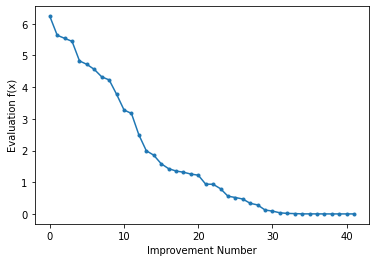

In [49]:
# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = []
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + np.random.randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # keep track of scores
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        # the higher the temperature, the higher the number
        metropolis = math.exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or np.random.rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]


# define range for input
bounds = np.array([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

# line plot of best scores
plt.figure()
plt.plot(scores, '.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')

### Same example but shifted

>0 f([-2.49764237]) = 7.23822
>1 f([-2.37454355]) = 6.63846
>5 f([-2.35392595]) = 6.54097
>6 f([-2.33373579]) = 6.44632
>14 f([-2.19744376]) = 5.82876
>15 f([-2.17239742]) = 5.71931
>20 f([-2.13529731]) = 5.55949
>21 f([-2.0796553]) = 5.32497
>22 f([-2.05630155]) = 5.22838
>30 f([-1.94287669]) = 4.77477
>33 f([-1.81143907]) = 4.28131
>34 f([-1.7805327]) = 4.17030
>35 f([-1.57948922]) = 3.49479
>36 f([-1.41201817]) = 2.99380
>37 f([-1.36169883]) = 2.85422
>38 f([-1.25897291]) = 2.58501
>39 f([-1.19545346]) = 2.42911
>45 f([-1.16365231]) = 2.35409
>48 f([-1.14716196]) = 2.31598
>49 f([-1.1217674]) = 2.25836
>50 f([-1.10540656]) = 2.22192
>52 f([-0.96915142]) = 1.93925
>60 f([-0.96737027]) = 1.93581
>61 f([-0.89145197]) = 1.79469
>67 f([-0.74799005]) = 1.55949
>69 f([-0.71975172]) = 1.51804
>70 f([-0.68513444]) = 1.46941
>71 f([-0.57825104]) = 1.33437
>72 f([-0.53242858]) = 1.28348
>73 f([-0.3499493]) = 1.12246
>74 f([-0.29835189]) = 1.08901
>75 f([-0.18706726]) = 1.03499
>76 f([-0.126500

Text(0, 0.5, 'Evaluation f(x)')

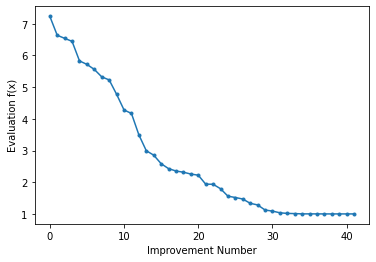

In [51]:
# seed the pseudorandom number generator
np.random.seed(16)

# objective function
def objective(x):
    return x[0]**2.0 + 1

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = []
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + np.random.randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # keep track of scores
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        # the higher the temperature, the higher the number
        metropolis = math.exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or np.random.rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]


# define range for input
bounds = np.array([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

# line plot of best scores
plt.figure()
plt.plot(scores, '.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')

### Same example but 2D

[-2.76708921  0.23163341]
>1 f([-2.75528802  0.13372384]) = 7.60949
>2 f([-2.74558568  0.20091519]) = 7.57861
>3 f([-2.72539552  0.16264542]) = 7.45423
>24 f([-2.63487843  0.61803468]) = 7.32455
>26 f([-2.55251726  0.61532209]) = 6.89397
>27 f([-2.53602692  0.64071665]) = 6.84195
>28 f([-2.51966607  0.57410375]) = 6.67831
>30 f([-2.46967505  0.60268787]) = 6.46253
>33 f([-2.36542302  0.65304611]) = 6.02170
>34 f([-2.34193973  0.7289644 ]) = 6.01607
>38 f([-2.26602181  0.70567451]) = 5.63283
>39 f([-2.03758433  0.71762806]) = 4.66674
>41 f([-1.86895639  0.84614075]) = 4.20895
>43 f([-1.77470928  0.80434516]) = 3.79656
>44 f([-1.76196446  0.80005781]) = 3.74461
>45 f([-1.69992946  0.67609066]) = 3.34686
>46 f([-1.56906766  0.76714274]) = 3.05048
>47 f([-1.55192312  0.67857087]) = 2.86892
>50 f([-1.37952673  0.86462678]) = 2.65067
>52 f([-1.29714529  0.87811357]) = 2.45367
>54 f([-1.17117056  0.68540115]) = 1.84142
>55 f([-1.11351678  0.58267748]) = 1.57943
>56 f([-0.93240523  0.47034704]

Text(0, 0.5, 'Evaluation f(x)')

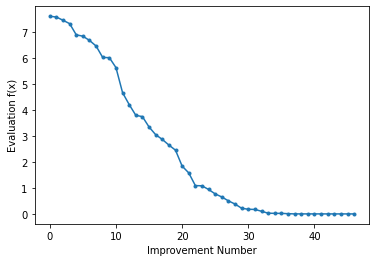

In [68]:
# seed the pseudorandom number generator
np.random.seed(16)

# objective function
def objective(x):
    return x[0]**2.0 + x[1]**2.0

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = []
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + np.random.randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # keep track of scores
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        # the higher the temperature, the higher the number
        metropolis = math.exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or np.random.rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]


# define range for input
bounds = np.array([[-5.0, 5.0], [-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

# line plot of best scores
plt.figure()
plt.plot(scores, '.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')

### Color dimensionality with 5 colors

In [100]:
from scipy.spatial import distance
import pandas as pd

In [115]:
a = [1, 1]
b = [0, 0]
print(distance.cityblock(a, b))  # Manhattan distance
print(distance.euclidean(a, b))

a = [1, 1]
b = [1, 1]
print(distance.cityblock(a, b))
print(distance.euclidean(a, b))

2
1.4142135623730951
0
0.0


In [116]:
# left_color, right_color, dist
color_s = np.array([
    [0, 1, 0], # 0, 1
    [0, 2, 0], # 0, 2
    [0, 3, 1], # 0, 3
    [0, 4, 1], # 0, 4
    [1, 2, 0], # 1, 2
    [1, 3, 1], # 1, 3
    [1, 4, 1], # 1, 4
    [2, 3, 1], # 2, 3
    [2, 4, 1], # 2, 4
    [3, 4, 1] # 3, 4
])

NO_COLORS = 5
NO_DIMS = 2
bounds = np.array([[-1.0, 1.0]] * NO_COLORS * NO_DIMS)
bounds

array([[-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

>0 f([-0.5927627   0.05226386  0.06355976 -0.88412775 -0.32051254 -0.60458921
  0.36032634 -0.57831395 -0.87289591  0.80943575]) = 5.86740
>9 f([-0.49808064  0.31266611  0.21166397 -0.62315215 -0.38018982 -0.28096135
  0.3677129  -0.5245634  -0.9304969   0.75251631]) = 5.85976
>10 f([-0.52484351  0.32719423  0.12197462 -0.54179663 -0.37748722 -0.33693686
  0.34107951 -0.50808737 -0.90662639  0.75468365]) = 5.61631
>11 f([-0.50252109  0.25030229  0.02717533 -0.50110655 -0.37157114 -0.38775429
  0.38227023 -0.50134397 -0.91068295  0.87185477]) = 5.20412
>12 f([-0.52372391  0.19033634  0.10909048 -0.4749042  -0.41451018 -0.30002425
  0.42067126 -0.47375303 -0.91731898  0.85087424]) = 5.00890
>13 f([-0.49197034  0.13069314  0.09656924 -0.50708606 -0.36426402 -0.27590978
  0.45506201 -0.50798235 -0.89016197  0.82690048]) = 4.71596
>15 f([-0.68565589  0.01985472  0.12703772 -0.35926467 -0.33044352 -0.22879114
  0.49007823 -0.59439274 -0.78772255  0.89740306]) = 4.65240
>17 f([-0.56773265  0.

Text(0, 0.5, 'Evaluation f(x)')

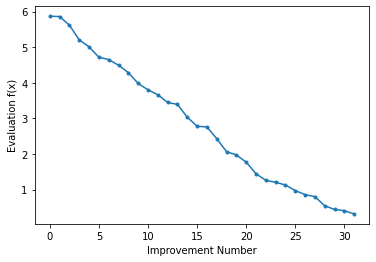

In [118]:
# seed the pseudorandom number generator
np.random.seed(16)

# objective function
def objective(x):
    loss, counter = 0, 0
    dist_s = pd.DataFrame([], columns=['real', 'estimated'])
    for i in range(no_colors):
        for j in range(i+1, no_colors):
            first_color, second_color, dist = color_s[counter]            
            pos_first_color = [x[first_color * 2], x[first_color * 2 + 1]]
            pos_second_color = [x[second_color * 2], x[second_color * 2 + 1]]
            dist_estimated = distance.euclidean(pos_first_color, pos_second_color)
            loss += np.abs(dist - dist_estimated)
            counter += 1
            dist_s = dist_s.append({'real': dist, 'estimated': dist_estimated}, ignore_index=True)
    return loss, dist_s

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval, _ = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = []
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + np.random.randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval, _ = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # keep track of scores
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        # the higher the temperature, the higher the number
        metropolis = math.exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or np.random.rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]


# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

# line plot of best scores
plt.figure()
plt.plot(scores, '.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')

In [119]:
_, dist_s = objective(best)
dist_s

,real,estimated
0,0.0,0.019393
1,0.0,0.046618
2,1.0,1.017990
3,1.0,1.028400
4,0.0,0.045672
5,1.0,1.019217
6,1.0,1.045964
7,1.0,0.973743
8,1.0,1.020966
9,1.0,1.047977


In [120]:
best

array([-0.58610389,  0.19879877, -0.5879478 ,  0.17949387, -0.54238312,
        0.18262151,  0.43101402,  0.15667204, -0.06005521,  1.08247214])